In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
df.shape

(1338, 7)

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

D:\Conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

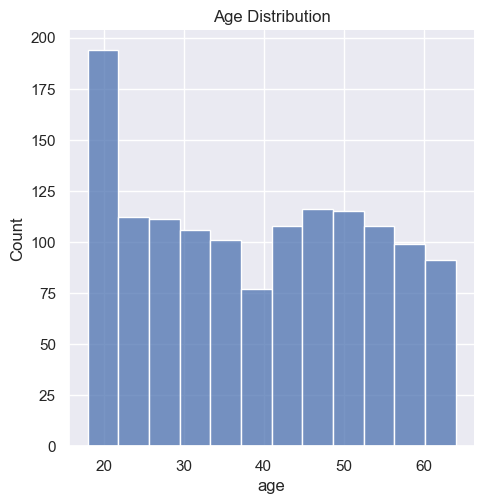

In [12]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['age'])
plt.title('Age Distribution')
plt.show()

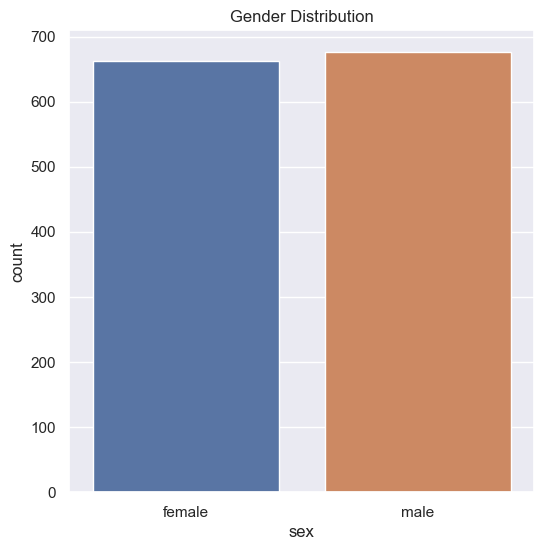

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title('Gender Distribution')
plt.show()

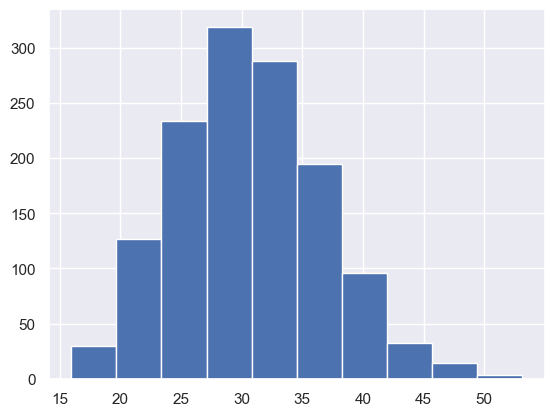

In [18]:
plt.hist(df['bmi'])
plt.show()

D:\Conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

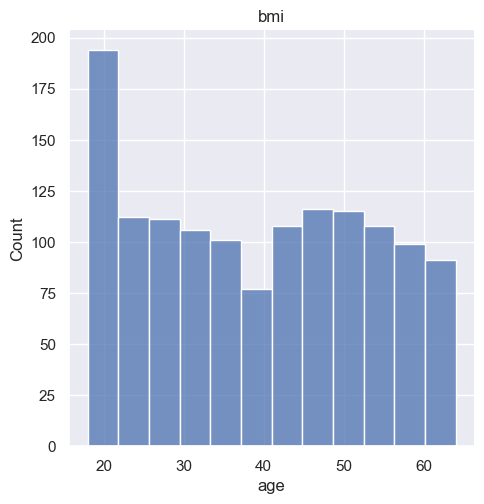

In [19]:
plt.figure(figsize=(6,6))
sns.displot(df['age'])
plt.title('bmi')
plt.show()

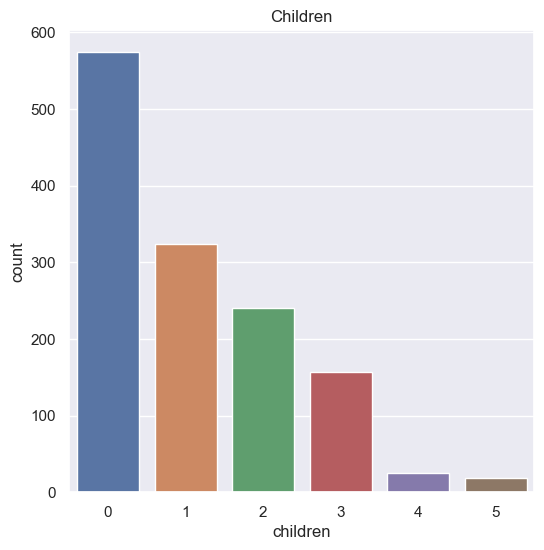

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

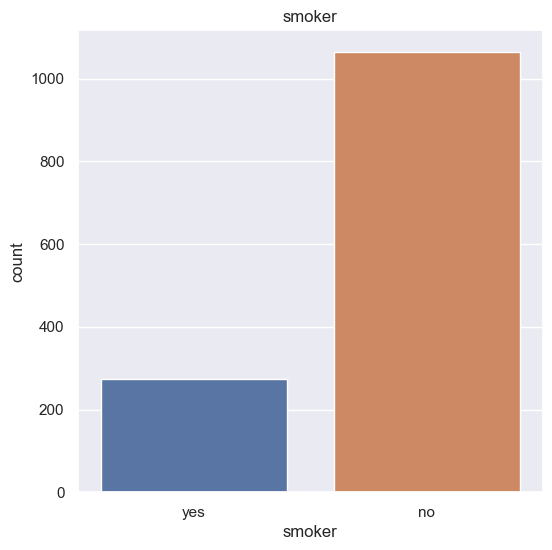

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

# Encoding the categorical features

In [25]:
#Encoding the sex column 
df.replace({'sex':{'male':0,'female':1}},inplace=True)

#Encoding the smoker column
df.replace({'smoker':{'yes':1,'no':0}},inplace=True)

#Encoding the region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [28]:
X= df.drop(columns='charges',axis=1)
Y=df['charges']
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [29]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [43]:
# loading the Linear Regression model
reg = LinearRegression()

In [44]:
reg.fit(X_train, Y_train)

LinearRegression()

In [45]:
training_data_prediction =reg.predict(X_train)
print(training_data_prediction)

[14796.52246205  9311.18614284  3321.43489181 ...   913.37809549
  5380.41001852  9509.33709144]


In [51]:
# R squared value
R2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', R2_train)

R squared vale :  0.7502059600664179


In [60]:
#prediction on the test data
test_data_prediction=reg.predict(X_test)
print(test_data_prediction)


[28133.95964986 34684.65394335 32295.4604834  10488.93477314
  2034.03416506 12756.64366452 14386.59011907 -1046.62608112
  8658.24111913  2018.0957458   2274.49619177 15912.30624796
 12859.16369367 31395.15612591  9044.72126157 15226.44421906
  2029.90871444 39824.27962853  8453.77240759  7191.88423435
 14553.74993611  2057.75083274 11062.17503689  7960.34131129
 26208.50304691  8613.90080925  1735.9613249   7857.44880005
 36745.4636591  10644.91398392 11655.78502615  5201.58373203
 36752.77155096  6035.42987085 10198.38052313 11336.50702812
 12733.46256253  9313.61159697 33551.25792596 38842.68649617
  9885.8943578   6421.44855337  5193.86557705  2365.72759665
 40064.39559122 11026.06213231 12960.01282969 14571.28536169
  1002.21024229   179.42020129 11889.92869246 13894.47741849
 30305.99986918 14249.12350286  6790.20853418 13043.55671654
 39008.79490733 10871.6296563  13796.14014237  3031.62559115
  5236.26084199  9146.43950532  4232.79042197 31134.76220656
  7284.62601778 35347.00

In [54]:
#R-Squared Value
R2_test=metrics.r2_score(Y_test,test_data_prediction)
print(R2_test)

0.7466625802841846


In [55]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = reg.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[27413.95243739]
The insurance cost is USD  27413.952437386128


D:\Conda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
